In [ ]:
# DATA ANALYSIS TEXTBOOK
# CHAPTER 12
# time series simulations

In [2]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [3]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
output = dirname + "da_case_studies/ch02-football-manager-success/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [4]:
# Import the prewritten helper functions
from py_helper_functions import *

In [5]:
# PART 1
# Random walk simulation
# Generate k random walks across time {0, 1, ... , T}

In [6]:
np.random.seed(10)
T = 100  # number of obs
k = 5  # nr of random walks generated
initial_value = 0

In [7]:
# create a function
def GetRandomWalk():
    # Add a standard normal at each step
    return initial_value + np.insert(np.cumsum(np.random.normal(0, 1, T)), 0, 0)

In [8]:
# list comprehension instead of R replicate to get pandas Dataframe easier
rws = pd.DataFrame([GetRandomWalk() for rep in range(k)]).T
rws.columns = ["V" + str(int(x) + 1) for x in rws.columns]
# to get the same time var like in R we use index+1
rws["time"] = rws.index + 1
rws

,V1,V2,V3,V4,V5,time
0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.331587,0.117476,0.133137,0.755300,0.462386,2
2,2.046865,-1.789981,1.335881,1.634786,-0.757470,3
3,0.501465,-2.712890,0.311128,1.394829,-0.564897,4
4,0.493081,-2.243139,0.471528,0.699773,-0.129447,5
...,...,...,...,...,...,...
96,9.461685,6.399711,-3.446238,10.785193,-4.184887,97
97,8.979592,7.346838,-3.238908,9.754585,-4.128572,98
98,9.069180,6.324527,-3.383973,8.396887,-3.582787,99
99,9.896178,7.491695,-3.220069,8.130385,-4.265910,100


In [9]:
rws = rws.melt(id_vars="time")
rws

,time,variable,value
0,1,V1,0.000000
1,2,V1,1.331587
2,3,V1,2.046865
3,4,V1,0.501465
4,5,V1,0.493081
...,...,...,...
500,97,V5,-4.184887
501,98,V5,-4.128572
502,99,V5,-3.582787
503,100,V5,-4.265910


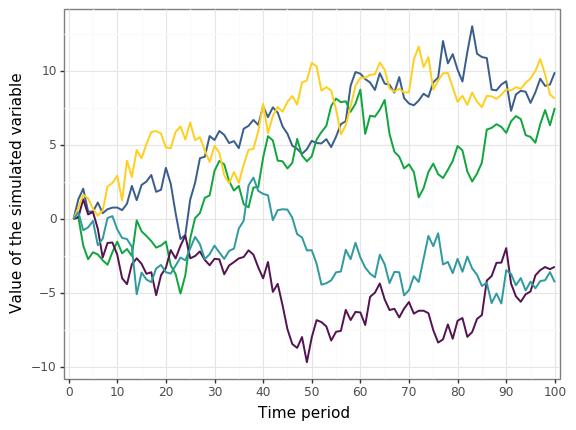

<ggplot: (8743771752274)>

In [10]:
ggplot(rws, aes("time", "value", color="variable")) + geom_line(
    show_legend=False, size=0.8
) + theme_bw() + scale_color_manual(
    values=(color[0], color[1], color[2], color[3], color[4])
) + labs(
    x="Time period", y="Value of the simulated variable"
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 100), breaks=seq(0, 101, 10)
)

In [11]:
# PART 2
# Serially correlated vs serially uncorrelated series
# simulation exercies
np.random.seed(1000)

In [12]:
uncorr = pd.DataFrame(np.random.normal(0, 1, 100), columns=["x"])
uncorr["t"] = uncorr.index + 1
uncorr

,x,t
0,-0.804458,1
1,0.320932,2
2,-0.025483,3
3,0.644324,4
4,-0.300797,5
...,...,...
95,0.818250,96
96,1.590437,97
97,-0.258288,98
98,0.447029,99


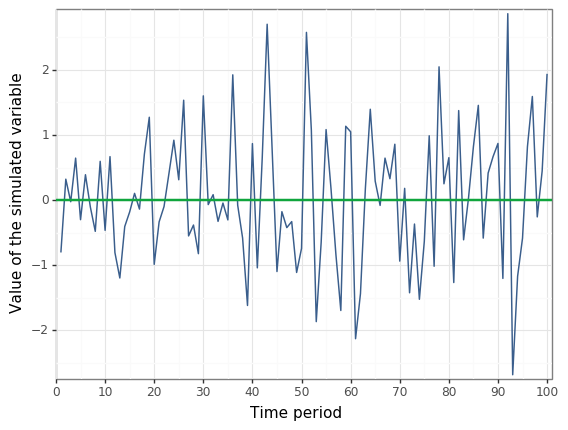

<ggplot: (8743798423450)>

In [13]:
# Whitenoise
ggplot(uncorr, aes("t", "x")) + geom_line(
    show_legend=False, size=0.6, color=color[0]
) + geom_hline(yintercept=0, color=color[1], size=1) + labs(
    x="Time period", y="Value of the simulated variable"
) + theme_bw() + scale_y_continuous(
    expand=(0.01, 0.01)
) + scale_x_continuous(
    expand=(0.01, 0.01), breaks=seq(0, 101, 10)
)

In [14]:
# serially correlated series, pho=0.8
np.random.seed(1000)
rho = 0.8
E = np.random.normal(0, 1, 100)
x = []
x.append(E[0])
for i in range(1, len(E)):
    x.append(rho * x[i - 1] + E[i])

In [15]:
corr08 = pd.DataFrame(E, columns=["E"])
corr08["t"] = corr08.index + 1

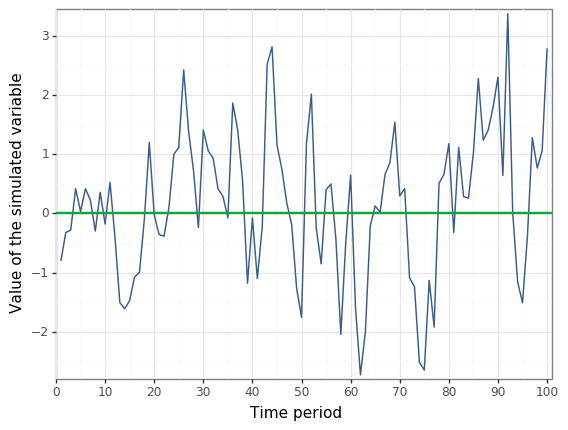

<ggplot: (8743758686684)>

In [17]:
ggplot(corr08, aes("t", x)) + geom_line(
    show_legend=False, size=0.6, color=color[0]
) + geom_hline(yintercept=0, color=color[1], size=1) + labs(
    x="Time period", y="Value of the simulated variable"
) + theme_bw() + scale_y_continuous(
    expand=(0.01, 0.01)
) + scale_x_continuous(
    expand=(0.01, 0.01), breaks=seq(0, 101, 10)
)